<h1><center>Data Preprocessing & Visualization</center></h1>

In [2]:
import random
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# Scenario
You are a data scientist at DaciaVision Analytics, a firm specializing in data-driven insights for the film industry. Your team has received a raw dataset containing the Top 1000 Movies from IMDb.  
However, the dataset is far from perfect — it contains missing values, inconsistencies, and outliers that need to be handled before any meaningful insights can be extracted.  
Your dataset: https://raw.githubusercontent.com/krishna-koly/IMDB_TOP_1000/refs/heads/main/imdb_top_1000.csv

In [37]:
# Extract raw data
url = "https://raw.githubusercontent.com/krishna-koly/IMDB_TOP_1000/refs/heads/main/imdb_top_1000.csv"
df = pd.read_csv(url)
df # Pandas Dataframe

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [4]:
# View dataset propreties
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


# Part 1: Data Preprocessing Pipeline
Apply data preprocessing techniques to clean, transform, and analyze a raw dataset, in 4 stages:
1. Data Cleaning
2. Data Transformation
3. Data Reduction
4. Feature Engineering

## Data Cleaning
* Handle missing values using at least two different strategies. Explain which one makes more sense in the current scenario.
* Detect and address outliers.
* Identify and fix inconsistencies in categorical and numerical data.

### Handle missing values

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

print("Columns with Missing Values:")
print(missing_values)

Columns with Missing Values:
Certificate    101
Meta_score     157
Gross          169
dtype: int64


#### Fill in missing values: Meta_score
We will use the following strategy:
- Add or subtract (with equal probability) from the median a value between 0 and value of standard deviation
- this way we ensure that the distribution remains stable

In [6]:
# Fill missing values from Meta_score

mean = df['Meta_score'].mean()
std = df['Meta_score'].std()

def fill_meta_score():
  adjustment = random.uniform(-std, std)
  new_value = mean + adjustment
  return new_value

df['Meta_score'] = df['Meta_score'].apply(lambda x: round(fill_meta_score(), 0) if pd.isna(x) else x)

print(f"Old mean: {mean}")
print(f"New mean: {df['Meta_score'].mean()}")

print(f"Old std: {std}")
print(f"New std: {df['Meta_score'].std()}")

print("Missing values for Meta_score: ", df['Meta_score'].isna().sum())

Old mean: 77.97153024911032
New mean: 77.959
Old std: 12.376099328602022
New std: 11.68871014889774
Missing values for Meta_score:  0


#### Fill in missing values: Gross
We will use the following strategy:
- Add or subtract (with equal probability) from the median a value between 0 and value of standard deviation
- this way we ensure that the distribution remains stable

In [7]:
# Convert Gross to a numerical category

df['Gross'] = pd.to_numeric(df['Gross'].str.replace(',', '', regex=True), errors='coerce')

print(df['Gross'].head())

0     28341469.0
1    134966411.0
2    534858444.0
3     57300000.0
4      4360000.0
Name: Gross, dtype: float64


In [8]:
# Fill missing values from Gross

mean = df['Gross'].mean()
std = df['Gross'].std()

def fill_gross():
  adjustment = random.uniform(-std, std)
  new_value = mean + adjustment
  return new_value

df['Gross'] = df['Gross'].apply(lambda x: round(fill_gross(), 0) if pd.isna(x) else x)

print(f"Old mean: {mean}")
print(f"New mean: {df['Gross'].mean()}")

print(f"Old std: {std}")
print(f"New std: {df['Gross'].std()}")

print("Missing values for Gross: ", df['Gross'].isna().sum())

Old mean: 68034750.87364621
New mean: 67900515.17
Old std: 109750043.19218516
New std: 103157516.68517928
Missing values for Gross:  0


#### Fill in missing values: Certificate
We will use strategy 3 the following way:  
- we assume that movie genres generally influence movie certificates
- for movies missing certificates, we will assign the most common certificate of movies with the same first genre

In [9]:
# View certificate values and their count

print(df['Certificate'].value_counts())

Certificate
U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
Unrated       1
TV-MA         1
16            1
U/A           1
Name: count, dtype: int64


In [10]:
# Merge certificate categories according to the Motion Picture Association film rating system - USA

certificate_mapping = {
  # General Audiences
  'G': 'G',
  'U': 'G', # Universal
  'GP': 'G', # General Public

  # Parental Guidance Suggested
  'PG': 'PG',
  'TV-PG': 'PG', # TV Parental Guidance
  'UA': 'PG', # Universal-Adult
  'U/A': 'PG', # Universal-Adult

  # Parents Strongly Cautioned
  'PG-13': 'PG-13',
  'TV-14': 'PG-13', # TV 14

  # Restricted
  'R': 'R',
  '16': 'R', # Restricted 16

  # Adult
  'A': 'A',
  'TV-MA': 'A', # TV Mature Audiences

  # Special
  'Passed': 'S',
  'Approved': 'S',
  'Unrated': 'S'
}

df['Certificate'] = df['Certificate'].replace(certificate_mapping)

print(df['Certificate'].value_counts())

Certificate
G        248
PG       216
A        198
R        147
S         46
PG-13     44
Name: count, dtype: int64


In [11]:
# Fill missing values from Certificate

# Function to find the most common certificate based on the genre tag
def most_common_certificate_by_genre(df, genre):
    # Filter the DataFrame for rows where the genre is part of the genre string
    genre_data = df[df['Genre'].str.contains(genre, case=False, na=False)]
    
    # Get the most common certificate for the given genre
    most_common_cert = genre_data['Certificate'].mode()
    
    # Return the most common certificate or None if no mode exists
    if not most_common_cert.empty:
        return most_common_cert[0]
    else:
        return None

# Function to fill missing certificates based on the first genre
def fill_missing_certificates(df):
    # Loop through rows where Certificate is NaN
    for index, row in df[df['Certificate'].isna()].iterrows():
        # Extract the first genre from the Genre column (before the first comma)
        first_genre = row['Genre'].split(',')[0].strip()
        
        # Use the first genre to find the most common certificate
        most_common_cert = most_common_certificate_by_genre(df, first_genre)
        
        if most_common_cert:
            # Fill the NaN value with the most common certificate
            df.at[index, 'Certificate'] = most_common_cert
        else:
            # Fill the NaN value with 'S'
            df.at[index, 'Certificate'] = 'S'
    return df

# Apply the function to fill missing certificates
df = fill_missing_certificates(df)

In [12]:
# Check again for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

print("Columns with Missing Values:")
print(missing_values)

Columns with Missing Values:
Series([], dtype: int64)


### Detect and address outliers
- Used only on numerical categories
- Detect outliers using the IQR and cap them within the lower and upper bounds

In [13]:
# Convert Released_Year to  numerical category

df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

print(df['Released_Year'].dtype)

print("Values lost through conversion:", df['Released_Year'].isna().sum())

float64
Values lost through conversion: 1


In [14]:
# Fill missing value from Released_Year

mode = df['Released_Year'].mode()[0]
df['Released_Year'] = df['Released_Year'].fillna(mode)

print("Missing values for Released_Year:", df['Released_Year'].isna().sum())

Missing values for Released_Year: 0


In [15]:
# Convert Runtime to numerical category

df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)

print(df['Runtime'].dtype)

int64


In [16]:
# Display numerical columns

print("Numerical columns before capping outliers:")
print(df.describe())

Numerical columns before capping outliers:
       Released_Year      Runtime  IMDB_Rating  Meta_score   No_of_Votes  \
count    1000.000000  1000.000000  1000.000000  1000.00000  1.000000e+03   
mean     1991.240000   122.891000     7.949300    77.95900  2.736929e+05   
std        23.296505    28.093671     0.275491    11.68871  3.273727e+05   
min      1920.000000    45.000000     7.600000    28.00000  2.508800e+04   
25%      1976.000000   103.000000     7.700000    71.00000  5.552625e+04   
50%      1999.000000   119.000000     7.900000    79.00000  1.385485e+05   
75%      2009.000000   137.000000     8.100000    86.00000  3.741612e+05   
max      2020.000000   321.000000     9.300000   100.00000  2.343110e+06   

              Gross  
count  1.000000e+03  
mean   6.790052e+07  
std    1.031575e+08  
min   -4.169178e+07  
25%    3.787488e+06  
50%    2.906650e+07  
75%    9.691479e+07  
max    9.366622e+08  


In [17]:
# Cap outliers using IQR method

def cap_outliers(df, columns):
  for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Select numeric columns and cap outliers
numeric_cols = df.select_dtypes(include=['number']).columns
cap_outliers(df, numeric_cols)

print("Numerical columns after capping outliers:")
print(df.describe())

Numerical columns after capping outliers:
       Released_Year      Runtime  IMDB_Rating   Meta_score    No_of_Votes  \
count    1000.000000  1000.000000  1000.000000  1000.000000    1000.000000   
mean     1991.262500   122.285000     7.946200    78.066000  250834.672250   
std        23.231585    25.994259     0.264907    11.355289  253676.078174   
min      1926.500000    52.000000     7.600000    48.500000   25088.000000   
25%      1976.000000   103.000000     7.700000    71.000000   55526.250000   
50%      1999.000000   119.000000     7.900000    79.000000  138548.500000   
75%      2009.000000   137.000000     8.100000    86.000000  374161.250000   
max      2020.000000   188.000000     8.700000   100.000000  852113.750000   

              Gross  
count  1.000000e+03  
mean   5.959873e+07  
std    7.258166e+07  
min   -4.169178e+07  
25%    3.787488e+06  
50%    2.906650e+07  
75%    9.691479e+07  
max    2.366057e+08  


### Identify and fix inconsistencies
We have already done the following:
- Merged similar categorical data (for Certificate)
- Convert categorical data to numerical data where possible

In [18]:
# Find and display the unique genres in the dataset

unique_genres = df['Genre'].str.split(',').explode().str.strip().unique()

print(unique_genres)

['Drama' 'Crime' 'Action' 'Adventure' 'Biography' 'History' 'Sci-Fi'
 'Romance' 'Western' 'Fantasy' 'Comedy' 'Thriller' 'Animation' 'Family'
 'War' 'Mystery' 'Music' 'Horror' 'Musical' 'Film-Noir' 'Sport']


In [19]:
# Replace 'Music' with 'Musical' in the 'Genre' column

df['Genre'] = df['Genre'].str.replace(r'\bMusic\b', 'Musical', regex=True)

unique_genres = df['Genre'].str.split(',').explode().str.strip().unique()
print(unique_genres)

['Drama' 'Crime' 'Action' 'Adventure' 'Biography' 'History' 'Sci-Fi'
 'Romance' 'Western' 'Fantasy' 'Comedy' 'Thriller' 'Animation' 'Family'
 'War' 'Mystery' 'Musical' 'Horror' 'Film-Noir' 'Sport']


In [20]:
# Check if the 'Poster_Link' column starts with 'https://'

valid_links = df['Poster_Link'].str.startswith('https://')

invalid_links_count = valid_links[valid_links == False].count()
print(f"Number of invalid links: {invalid_links_count}")


Number of invalid links: 0


In [21]:
# Create copy of pre-normalized data
df_pre_normalized = df.copy()

## Data Transformation

- Normalize or standardize numerical features where necessary.
- Encode categorical variables using appropriate encoding techniques (one-hot, label encoding, etc.).
- Perform feature scaling and explain its necessity in different scenarios.

In [22]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

### Normalize or standardize numerical features
For the numerical features we will apply the following:
- **Released_Year**: normalization
- **Runtime**: standardization
- **IMDB_Rating**: normalization
- **Meta_score**: normalization
- **No_of_Votes**: standardization
- **Gross**: standardization

In [23]:
# Normalize or scale numerical features

# Initialize scalers
min_max_scaler = MinMaxScaler()  # For normalization
standard_scaler = StandardScaler()  # For standardization

# Normalize 'Released_Year', 'IMDB_Rating', and 'Meta_score'
df['Released_Year'] = min_max_scaler.fit_transform(df[['Released_Year']])
df['IMDB_Rating'] = min_max_scaler.fit_transform(df[['IMDB_Rating']])
df['Meta_score'] = min_max_scaler.fit_transform(df[['Meta_score']])

# Standardize 'Runtime' and 'Gross'
df['Runtime'] = standard_scaler.fit_transform(df[['Runtime']])
df['No_of_Votes'] = standard_scaler.fit_transform(df[['No_of_Votes']])
df['Gross'] = standard_scaler.fit_transform(df[['Gross']])

# Display the transformed data
print(df[['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score','No_of_Votes', 'Gross']].head())

   Released_Year   Runtime  IMDB_Rating  Meta_score  No_of_Votes     Gross
0       0.721925  0.758816          1.0    0.611650     2.371449 -0.430865
1       0.486631  2.028963          1.0    1.000000     2.371449  1.038904
2       0.871658  1.143709          1.0    0.689320     2.371449  2.439949
3       0.508021  2.529323          1.0    0.805825     2.371449 -0.031687
4       0.326203 -1.011691          1.0    0.922330     1.731460 -0.761437


### Encode categorical features
- **Certificate**: label encoding  
  Scale from 1 to 6 based on how appropriate it is for general audiences: 1: A ; 2: R ; 3: S ; 4: PG-13 ; 5: PG ; 6: G  
  
- **Genre**: one-hot encoding  
  Each category is converted into a new column, where entries are either 1 or 0

In [24]:
# Encode categorical features

# Perform label encoding for Certificate
certificate_mapping = {
  'A': 1,
  'R': 2,
  'S': 3,
  'PG-13': 4,
  'PG': 5,
  'G': 6
}

df['Certificate'] = df['Certificate'].map(certificate_mapping)

# Perform one-hot encoding for Genre
for genre in unique_genres:
  # Create a new column for each genre, where it's 1 if the genre is in the 'Genre' column, else 0
  df[genre] = df['Genre'].str.contains(genre, case=False, na=False).astype(int)

# Display the transformed dataframe
print(df[['Certificate', 'Genre', *unique_genres]].head())

# Delete old Genre column
df = df.drop(columns=['Genre'])

   Certificate                 Genre  Drama  Crime  Action  Adventure  \
0            1                 Drama      1      0       0          0   
1            1          Crime, Drama      1      1       0          0   
2            5  Action, Crime, Drama      1      1       1          0   
3            1          Crime, Drama      1      1       0          0   
4            6          Crime, Drama      1      1       0          0   

   Biography  History  Sci-Fi  Romance  ...  Comedy  Thriller  Animation  \
0          0        0       0        0  ...       0         0          0   
1          0        0       0        0  ...       0         0          0   
2          0        0       0        0  ...       0         0          0   
3          0        0       0        0  ...       0         0          0   
4          0        0       0        0  ...       0         0          0   

   Family  War  Mystery  Musical  Horror  Film-Noir  Sport  
0       0    0        0        0       0   

## Data Reduction
- Apply dimensionality reduction techniques.  
- Remove redundant or irrelevant features based on logical reasoning.  
- Justify how data reduction improves performance and interpretability.

### Feature selection
For our model, the following features serve no meaningful purpose, and therefore we can discard them:
- Poster_Link
- Overview

In [25]:
# Drop columns Poster_Link and Overview

df.drop(columns=['Poster_Link'], inplace=True)
df.drop(columns=['Overview'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   float64
 2   Certificate    1000 non-null   int64  
 3   Runtime        1000 non-null   float64
 4   IMDB_Rating    1000 non-null   float64
 5   Meta_score     1000 non-null   float64
 6   Director       1000 non-null   object 
 7   Star1          1000 non-null   object 
 8   Star2          1000 non-null   object 
 9   Star3          1000 non-null   object 
 10  Star4          1000 non-null   object 
 11  No_of_Votes    1000 non-null   float64
 12  Gross          1000 non-null   float64
 13  Drama          1000 non-null   int64  
 14  Crime          1000 non-null   int64  
 15  Action         1000 non-null   int64  
 16  Adventure      1000 non-null   int64  
 17  Biography      1000 non-null   int64  
 18  History  

### Removing highly correlated features
Let us analyse the correlation between the features. If some elements are highly corelated, we can keep only one of them.

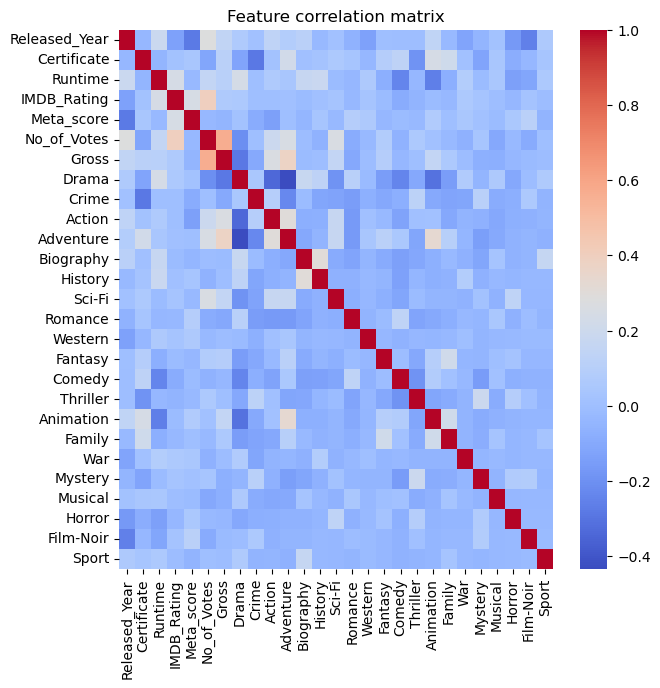

In [26]:
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, cmap = "coolwarm", fmt = ".2f")
plt.title("Feature correlation matrix")
plt.show()

We observe no highly correlated features that we might discard.

### Removing low variance features
Next, if a feature has low variance, we can delete it without affecting the model very much.

In [27]:
# Delete low-variance features

# Separate numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(exclude=['float64', 'int64']).columns

# Apply VarianceThreshold only on numerical columns
selector = VarianceThreshold(threshold=0.05)
df_numerical_reduced = selector.fit_transform(df[numerical_cols])

# Convert the resulting reduced numerical data back to a DataFrame
df_numerical_reduced = pd.DataFrame(df_numerical_reduced, columns=numerical_cols[selector.get_support()])

# Recombine the reduced numerical columns with the categorical columns
df_final = pd.concat([df_numerical_reduced, df[categorical_cols]], axis=1)

# Display the final DataFrame
print("Remaining number of columns:", len(df_final.columns))
df_final.head()

Remaining number of columns: 26


,Released_Year,Certificate,Runtime,IMDB_Rating,No_of_Votes,Gross,Drama,Crime,Action,Adventure,...,Thriller,Animation,Family,Mystery,Series_Title,Director,Star1,Star2,Star3,Star4
0,0.721925,1.0,0.758816,1.0,2.371449,-0.430865,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,The Shawshank Redemption,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,0.486631,1.0,2.028963,1.0,2.371449,1.038904,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,The Godfather,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton
2,0.871658,5.0,1.143709,1.0,2.371449,2.439949,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,The Dark Knight,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
3,0.508021,1.0,2.529323,1.0,2.371449,-0.031687,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,The Godfather: Part II,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton
4,0.326203,6.0,-1.011691,1.0,1.731460,-0.761437,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12 Angry Men,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler


### Dimensionality Reduction
We can apply Principal Component Analysis (PCA) to reduce the number of features while keeping most of the dataset’s variance.  
I apply PCA to reduce the dimensionality of the Genre one-hot encoded matrix.

In [28]:
# PCA Algorithm for Data Reduction

genre_data = df[unique_genres]

scaler = StandardScaler()
scaled_genre_data = scaler.fit_transform(genre_data)

pca = PCA(n_components=4)
pca_transformed = pca.fit_transform(scaled_genre_data)

df_pca = pd.DataFrame(pca_transformed, columns = ["PC1", "PC2", "PC3", "PC4"])
print("Explained variance ratio:", pca.explained_variance_ratio_)
df_pca.head()

Explained variance ratio: [0.11438137 0.0891263  0.07576687 0.06446065]


,PC1,PC2,PC3,PC4
0,0.685197,-0.224102,-0.013177,-0.096401
1,1.051675,0.594188,-0.183710,0.579333
2,0.324705,1.323938,0.465101,0.033302
3,1.051675,0.594188,-0.183710,0.579333
4,1.051675,0.594188,-0.183710,0.579333


## Feature Engineering
- Create new meaningful features using transformations, aggregations, or domain knowledge.  
- Use statistical methods (correlation analysis, feature importance) tovalidate the impact of new features.  
- Explain the rationale behind feature engineering choices.

### Use PCA to generate new Genres
- We will use the 4 categories found earlier to simplify the Genre classification system.
- This works because the variance ratio is relatively low.
- We calculate the importance of the first 3 genres to name the new categories.

In [29]:
# Compute contributions of each genre feature in each principal component

pc_importance = pd.DataFrame(
    np.abs(pca.components_),
    columns=genre_data.columns
)

# Identify the top 3 most influential genres for each principal component
top_features_per_pc = pc_importance.apply(lambda x: x.nlargest(3).index.tolist(), axis=1)

# Display the top contributing genres for each principal component
for idx, features in top_features_per_pc.items():
    print(f"PC{idx+1}: {', '.join(features)}")

PC1: Drama, Adventure, Animation
PC2: Thriller, Mystery, Crime
PC3: Biography, History, Romance
PC4: Family, Sci-Fi, Fantasy


In [30]:
# Replace original Genre features with PCA features

# Drop original genre features
df_reduced = df.drop(columns=unique_genres)

# Concatenate PCA-transformed genre data
df_reduced = pd.concat([df_reduced, df_pca], axis=1)

# Display the first few rows
df_reduced.head()

,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,PC1,PC2,PC3,PC4
0,The Shawshank Redemption,0.721925,1,0.758816,1.0,0.611650,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2.371449,-0.430865,0.685197,-0.224102,-0.013177,-0.096401
1,The Godfather,0.486631,1,2.028963,1.0,1.000000,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,2.371449,1.038904,1.051675,0.594188,-0.183710,0.579333
2,The Dark Knight,0.871658,5,1.143709,1.0,0.689320,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2.371449,2.439949,0.324705,1.323938,0.465101,0.033302
3,The Godfather: Part II,0.508021,1,2.529323,1.0,0.805825,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,2.371449,-0.031687,1.051675,0.594188,-0.183710,0.579333
4,12 Angry Men,0.326203,6,-1.011691,1.0,0.922330,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,1.731460,-0.761437,1.051675,0.594188,-0.183710,0.579333


In [31]:
# Rename features

df_reduced.rename(columns={
    "PC1": "Drama_Adventure_Animation",
    "PC2": "Thriller_Mystery_Crime",
    "PC3": "Biography_History_Romance",
    "PC4": "Family_SciFi_Fantasy"
}, inplace=True)

# Display the first few rows
df_reduced.head()

,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Drama_Adventure_Animation,Thriller_Mystery_Crime,Biography_History_Romance,Family_SciFi_Fantasy
0,The Shawshank Redemption,0.721925,1,0.758816,1.0,0.611650,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2.371449,-0.430865,0.685197,-0.224102,-0.013177,-0.096401
1,The Godfather,0.486631,1,2.028963,1.0,1.000000,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,2.371449,1.038904,1.051675,0.594188,-0.183710,0.579333
2,The Dark Knight,0.871658,5,1.143709,1.0,0.689320,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2.371449,2.439949,0.324705,1.323938,0.465101,0.033302
3,The Godfather: Part II,0.508021,1,2.529323,1.0,0.805825,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,2.371449,-0.031687,1.051675,0.594188,-0.183710,0.579333
4,12 Angry Men,0.326203,6,-1.011691,1.0,0.922330,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,1.731460,-0.761437,1.051675,0.594188,-0.183710,0.579333


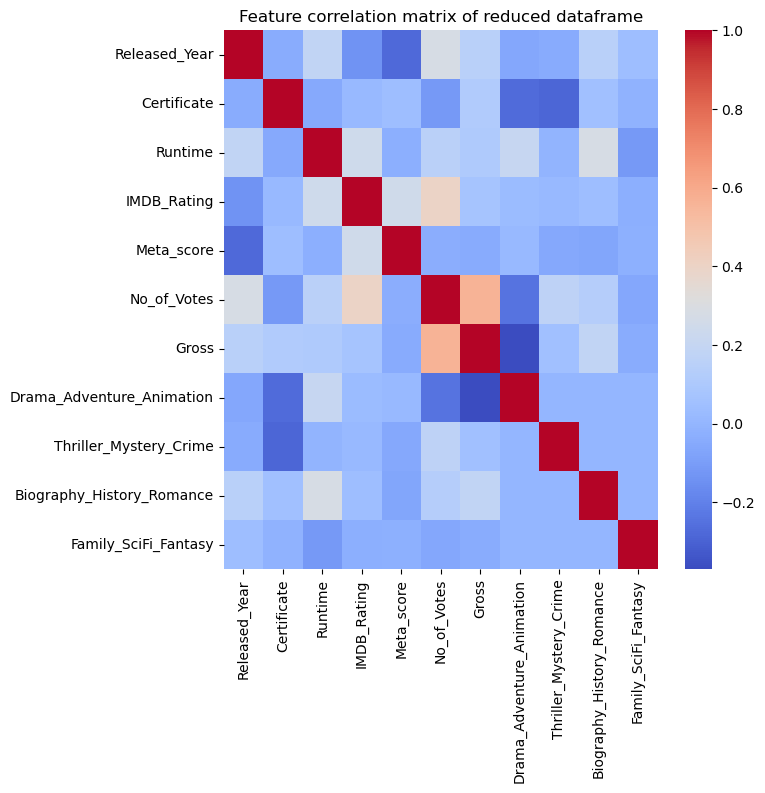

In [32]:
# Print correlation heatmap for new features

plt.figure(figsize=(7, 7))
sns.heatmap(df_reduced.select_dtypes(include=[np.number]).corr(), cmap = "coolwarm", fmt = ".2f")
plt.title("Feature correlation matrix of reduced dataframe")
plt.show()

In [34]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Series_Title               1000 non-null   object 
 1   Released_Year              1000 non-null   float64
 2   Certificate                1000 non-null   int64  
 3   Runtime                    1000 non-null   float64
 4   IMDB_Rating                1000 non-null   float64
 5   Meta_score                 1000 non-null   float64
 6   Director                   1000 non-null   object 
 7   Star1                      1000 non-null   object 
 8   Star2                      1000 non-null   object 
 9   Star3                      1000 non-null   object 
 10  Star4                      1000 non-null   object 
 11  No_of_Votes                1000 non-null   float64
 12  Gross                      1000 non-null   float64
 13  Drama_Adventure_Animation  1000 non-null   float6

In [35]:
# Export processed data as csv

df_reduced.to_csv("processed_data.csv", index=False)

# Part 2: Insights

## Insight 1: Distribution of Release Years

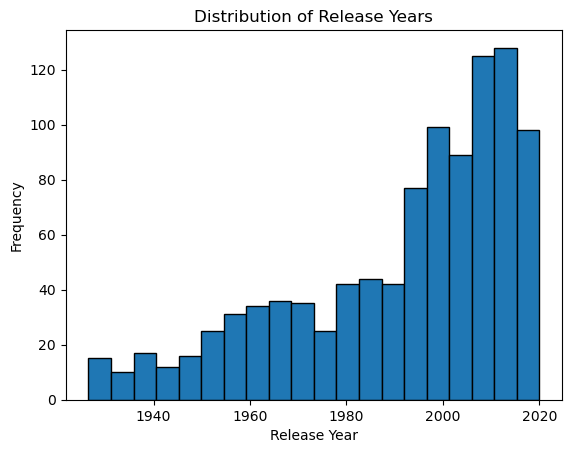

In [33]:
# Plot the distribution of Release Years

plt.figure()
plt.hist(df_pre_normalized['Released_Year'], edgecolor='black', bins=20)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

The graph shows an exponential increase in the number of high rated movie as the release year grows.  

## Insight 2: Distribution of runtime

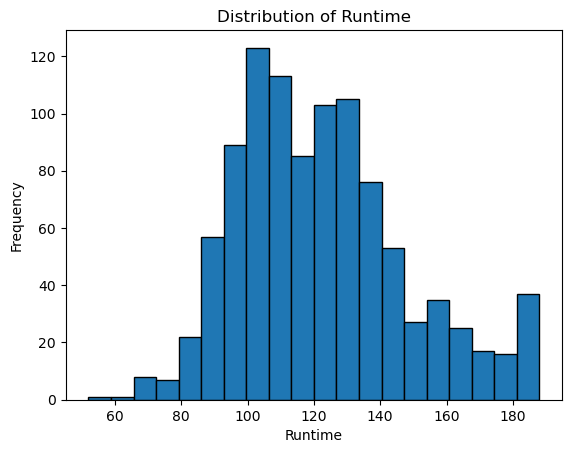

In [34]:
# Plot the distribution of Runtime

plt.figure()
plt.hist(df_pre_normalized['Runtime'], edgecolor='black', bins=20)
plt.title('Distribution of Runtime')
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.show()

The runtime distribution seems to follow a bell curve, even before normalization.  
Note that the spike in maximum values is likely due to the outlier capping.

## Inshight 3: Distribution of Votes Number

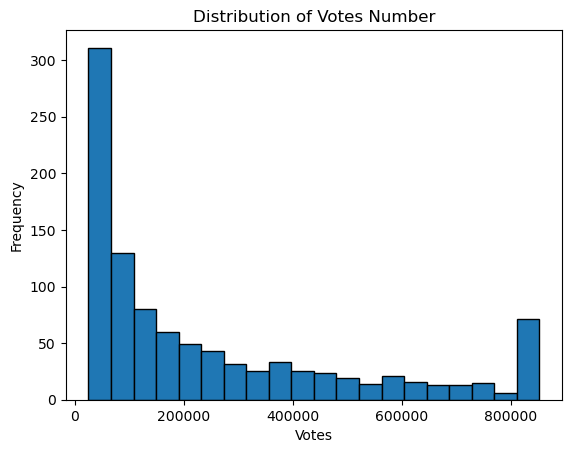

In [35]:
# Plot the distribution of No_of_Votes

plt.figure()
plt.hist(df_pre_normalized['No_of_Votes'], edgecolor='black', bins=20)
plt.title('Distribution of Votes Number')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.show()

Here, we can see a geometric distribution with capped outliers.

## Inshight 4: Distribution of Certificates

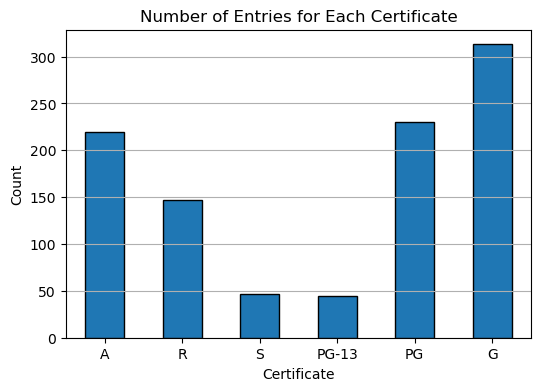

In [64]:
# Plot the distribution of Certificates

certificate_counts = df['Certificate'].value_counts()
certificate_counts = certificate_counts.sort_index()

plt.figure(figsize=(6, 4))
certificate_counts.plot(kind='bar', edgecolor='black')

plt.title("Number of Entries for Each Certificate")
plt.xlabel("Certificate")
plt.ylabel("Count")
plt.xticks(ticks=range(len(certificate_counts)), labels=["A", "R", "S", "PG-13", "PG", "G"], rotation=0)
plt.grid(axis='y')
plt.show()


We can see most entries in the General and Parental Guidance category. There are also quite a number of entries in the Adult category and fewer in between.

## Insight 5: Average Gross by Certificate

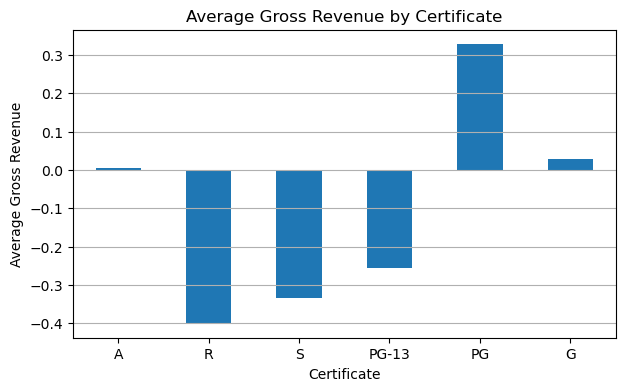

In [47]:
# Plot the average Gross by Certificate

avg_gross_by_cert = df.groupby('Certificate')['Gross'].mean()

plt.figure(figsize=(7, 4))
avg_gross_by_cert.plot(kind='bar')
plt.title('Average Gross Revenue by Certificate')
plt.xlabel('Certificate')
plt.ylabel('Average Gross Revenue')
plt.xticks(ticks=range(len(avg_gross_by_cert)), labels=["A", "R", "S", "PG-13", "PG", "G"], rotation=0)
plt.grid(axis='y')
plt.show()


We generally see that movies with little to no explicit content perform better in terms of gross revenue.

## Insight 6: Average Meta Score by Release Year

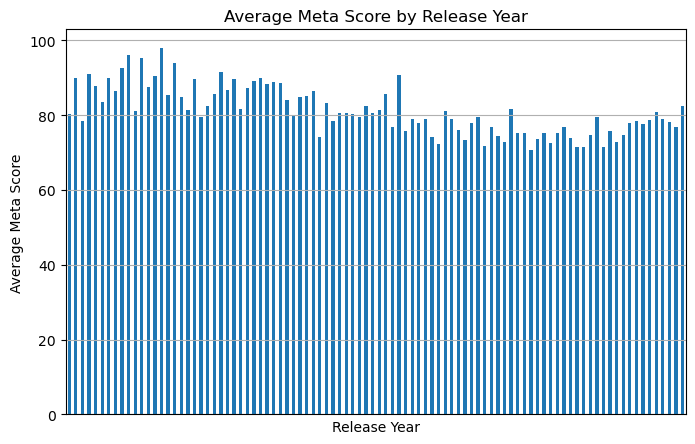

In [74]:
# Plot the average Meta Score by Release Year

avg_score_by_year = df_pre_normalized.groupby('Released_Year')['Meta_score'].mean()
avg_score_by_year = avg_score_by_year.sort_index()

plt.figure(figsize=(8, 5))
avg_score_by_year.plot(kind='bar')
plt.title('Average Meta Score by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Meta Score')
plt.xticks([], [])
plt.grid(axis='y')
plt.show()


This shows that, on average, older movies in the database have a slightly better meta score. This might however be due to selection bias (condier we have less entries for older movies too).

## Insight 7: Average Gross by IMDB Rating

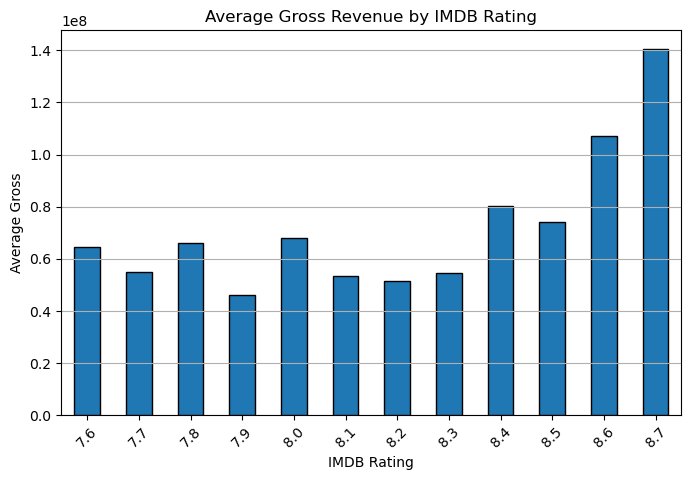

In [75]:
# Plot the average Gross by IMDB Rating

avg_gross = df_pre_normalized.groupby('IMDB_Rating')['Gross'].mean()
avg_gross = avg_gross.sort_index()

plt.figure(figsize=(8, 5))
avg_gross.plot(kind='bar', edgecolor='black')

plt.title("Average Gross Revenue by IMDB Rating")
plt.xlabel("IMDB Rating")
plt.ylabel("Average Gross")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

We find that, as expected, movies considered of better quality also perform better in terms of gross revenue.

## Insight 8: Correlation between Certificate and Genre

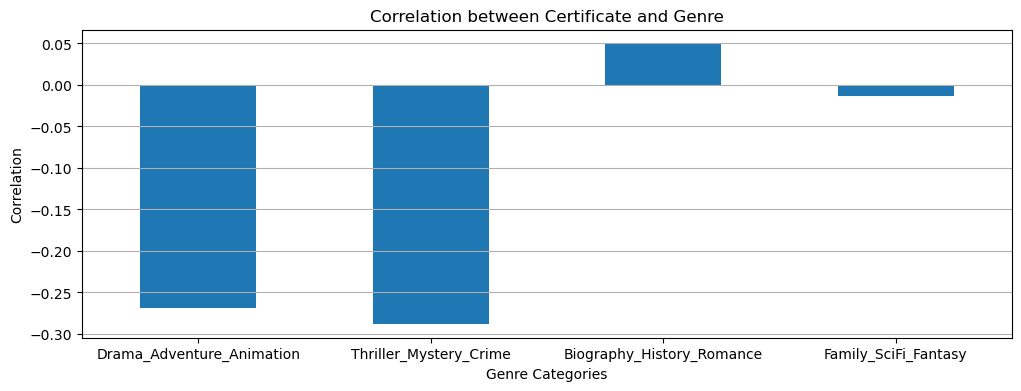

In [244]:
# Plot the correlation between Certificate values and Genre categories

genre_columns = ["Drama_Adventure_Animation", "Thriller_Mystery_Crime", "Biography_History_Romance", "Family_SciFi_Fantasy"]
columns_to_plot = genre_columns + ["Certificate"]

correlation_matrix = df_reduced[columns_to_plot].corr()
certificate_correlation = correlation_matrix.loc["Certificate"].drop("Certificate")

plt.figure(figsize=(12, 4))
certificate_correlation.plot(kind='bar')
plt.title('Correlation between Certificate and Genre')
plt.ylabel('Correlation')
plt.xlabel('Genre Categories')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


The plot shows that the Drama, Adventure, Animation category and the Thriller, Mystery, Crime category are negatively correlated to the certificate encoding. This essentially means that they are more likely to contain parental advisory.  
The other two categories are neutrally or slightly positively correlated, meaning that they are more fitted for general audiences.

## Insight 9: Top 10 Directors by Average IMDB Rating

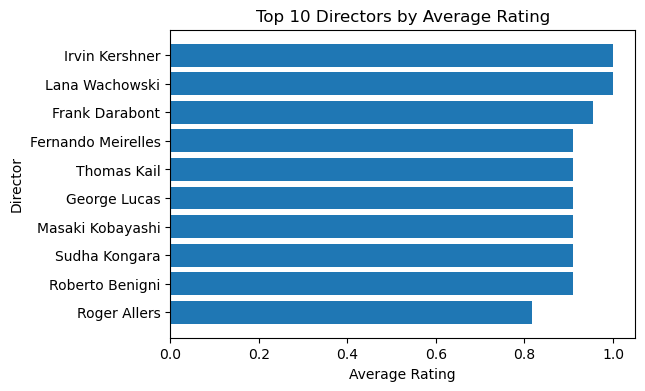

In [257]:
# Plot best 10 directors by average rating

if 'Director' in df.columns:
  director_avg = df.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False).head(10)
  plt.figure(figsize=(6, 4))
  plt.barh(director_avg.index, director_avg.values,)
  plt.gca().invert_yaxis()  # Show highest ratings at the top
  plt.title('Top 10 Directors by Average Rating')
  plt.xlabel('Average Rating')
  plt.ylabel('Director')
  
  plt.show()

## Insight 10: Top 5 Actors by Average IMDB Rating

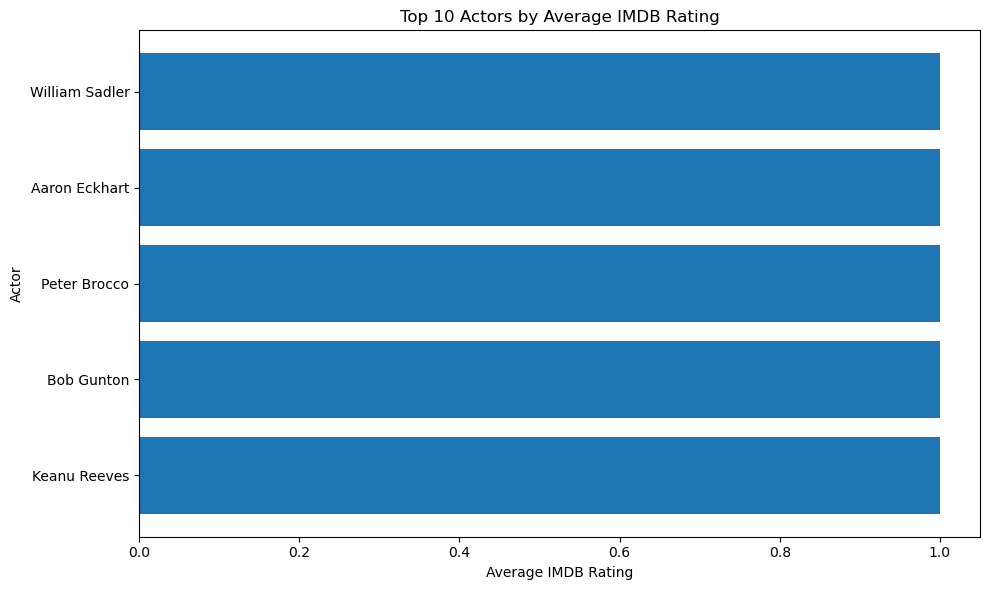

In [260]:
# Plot top 5 Actors with Highest Average IMDB Rating

star_cols = ['Star1', 'Star2', 'Star3', 'Star4']
if all(col in df.columns for col in star_cols):

    df_actors = df.melt(id_vars=['IMDB_Rating'], value_vars=star_cols, var_name='Star_Position', value_name='Actor')

    df_actors = df_actors.dropna(subset=['Actor'])
    df_actors['Actor'] = df_actors['Actor'].str.strip()

    actor_avg = df_actors.groupby('Actor')['IMDB_Rating'].mean().sort_values(ascending=False).head(5)

    plt.figure(figsize=(10, 6))
    plt.barh(actor_avg.index, actor_avg.values)
    plt.gca().invert_yaxis()
    plt.title('Top 10 Actors by Average IMDB Rating')
    plt.xlabel('Average IMDB Rating')
    plt.ylabel('Actor')

    plt.tight_layout()
    plt.show()
else:
    print("One or more of the expected star columns (Star1, Star2, Star3, Star4) are missing from the DataFrame.")

# Part 3: Movie Recommendation System (Without AI)
You need build a content-based movie recommendation logic using only similar metrics, without AI or ML models.  
  
Instead of training an algorithm, you must usefeature similarity to recommend movies - as a function that given a movie title will return back Top 5 most similar movies.  
  
It is at your imagination to come with asolution and argument why you thinks it fits the best as a recommendation logic.

### Implementation using cosine similarity
- We choose the following features to be considered for the similarity vectors:
  - Released_Year, Certificate, IMDB_Rating, Director
  - Drama_Adventure_Animation, Thriller_Mystery_Crime, Biography_History_Romance and Family_SciFi_Fantasy
- According to the numerical and categorical encoding, the feature matrix is extracted and the similarity matrix is computed
- To compute the similarity matrix, we use the ```cosine_similarity``` function imported from the library ```sklearn.metrics.pairwise```
- For each input vector, the cosine similarities to all other vectors are compared and the top 5 are extracted.

In [76]:
# Movie recommendation function (without AI)

def recommend_movies(title, df_reduced):
    # Features considered for similarity
    features = ["Released_Year", "Certificate", "IMDB_Rating",
                "Drama_Adventure_Animation", "Thriller_Mystery_Crime",
                "Biography_History_Romance", "Family_SciFi_Fantasy"]

    # Encode Director since it is not numerical
    if df_reduced["Director"].dtype == "object":
        encoder = LabelEncoder()
        df_reduced["Director_Encoded"] = encoder.fit_transform(df_reduced["Director"])
        features.append("Director_Encoded")

    # Extract the feature matrix
    feature_matrix = df_reduced[features]

    # Compute cosine similarity between all movies
    similarity_matrix = cosine_similarity(feature_matrix)

    # Find index of the movie given as input
    if title not in df_reduced["Series_Title"].values:
        return "Movie not found in dataset."

    movie_idx = df_reduced[df_reduced["Series_Title"] == title].index[0]

    # Get similarity scores for the given movie
    similarity_scores = list(enumerate(similarity_matrix[movie_idx]))

    # Sort movies by similarity score (excluding itself)
    sorted_movies = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:6]

    # Return the top 5 most similar movie titles
    recommended_titles = [df_reduced.iloc[i[0]]["Series_Title"] for i in sorted_movies]

    return recommended_titles


In [77]:
# Test movie reccomendation function

movie = "The Godfather"
recommended_movies = recommend_movies(movie, df_reduced)
print(f"If you like {movie}, you might like:")
print(recommended_movies)

movie = "The Matrix"
recommended_movies = recommend_movies(movie, df_reduced)
print(f"\nIf you like {movie}, you might like:")
print(recommended_movies)

movie = "The Lion King"
recommended_movies = recommend_movies(movie, df_reduced)
print(f"\nIf you like {movie}, you might like:")
print(recommended_movies)

If you like The Godfather, you might like:
['The Godfather: Part II', 'Cidade de Deus', 'Les quatre cents coups', 'The Silence of the Lambs', 'Manbiki kazoku']

If you like The Matrix, you might like:
['V for Vendetta', 'District 9', 'Logan', 'The Wild Bunch', 'Alien']

If you like The Lion King, you might like:
['E.T. the Extra-Terrestrial', 'Big Fish', 'The Hobbit: An Unexpected Journey', 'The Hobbit: The Desolation of Smaug', 'Le Petit Prince']
